In [1]:
# ===================================================
# Импорт необходимых библиотек / Import required libraries
# ===================================================
import pandas as pd  # Для работы с данными / For data manipulation
import numpy as np  # Для математических операций / For mathematical operations
import matplotlib.pyplot as plt  # Для визуализации / For visualization
import seaborn as sns  # Для улучшенной визуализации / For enhanced visualization
import warnings  # Для управления предупреждениями / For warning management
import joblib  # Для сохранения моделей / For saving models

# Импорт методов машинного обучения / Import machine learning methods
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV  # Для разделения данных / For data splitting
from sklearn.preprocessing import StandardScaler, LabelEncoder  # Для масштабирования данных / For data scaling
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression  # Логистическая регрессия
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier, HistGradientBoostingClassifier  # Случайный лес, Градиентный бустинг, Экстра-деревья, Бэггинг, Градиентный бустинг с гистограммами
from sklearn.svm import SVC  # Метод опорных векторов
from sklearn.neighbors import KNeighborsClassifier  # Метод k-ближайших соседей
from sklearn.tree import DecisionTreeClassifier  # Дерево решений
from xgboost import XGBClassifier  # Экстремальный градиентный бустинг
from lightgbm import LGBMClassifier  # Легкий градиентный бустинг
from catboost import CatBoostClassifier  # Категориальный бустинг
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score, precision_score, recall_score, f1_score  # Отчет о классификации, Матрица ошибок, ROC-кривая, Площадь под ROC-кривой, Precision-Recall кривая, Средняя точность
from sklearn.neighbors import KNeighborsClassifier  # Метод k-ближайших соседей
from sklearn.naive_bayes import GaussianNB  # Наивный байесовский классификатор
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis  # Квадратичный дискриминантный анализ

from sklearn.pipeline import Pipeline

# Импорт методов балансировки / Import balancing methods
from imblearn.over_sampling import SMOTE, SMOTENC  
from imblearn.under_sampling import RandomUnderSampler  # Случайное уменьшение выборки
from imblearn.combine import SMOTEENN  # SMOTE с редактированием соседей
from imblearn.over_sampling import ADASYN  # Адаптивная синтетическая выборка
from imblearn.over_sampling import BorderlineSMOTE  # SMOTE для пограничных случаев


In [2]:
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

In [3]:
df = pd.read_csv("Dataset.csv")

df.head(3)

,_id,TimeStamp,PART_FACT_PLAN_DATE,PART_FACT_SERIAL,PART_NAME,EQUIP_CD,EQUIP_NAME,PassOrFail,Reason,Injection_Time,...,Mold_Temperature_3,Mold_Temperature_4,Mold_Temperature_5,Mold_Temperature_6,Mold_Temperature_7,Mold_Temperature_8,Mold_Temperature_9,Mold_Temperature_10,Mold_Temperature_11,Mold_Temperature_12
0,5f8928bb9c0189cc666ef19b,2020-10-16 04:57:47,2020-10-16 오전 12:00:00,24,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,Y,NaN,9.59,...,24.799999,27.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5f8928de9c0189cc666ef20b,2020-10-16 04:58:48,2020-10-16 오전 12:00:00,24,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,Y,NaN,9.60,...,24.799999,27.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5f8928df9c0189cc666ef213,2020-10-16 04:58:48,2020-10-16 오전 12:00:00,23,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,Y,NaN,9.60,...,24.799999,27.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:

df['PART_NAME'].value_counts()

PART_NAME
CN7 W/S SIDE MLD'G RH        3371
CN7 W/S SIDE MLD'G LH        3365
RG3 MOLD'G W/SHLD, LH         628
RG3 MOLD'G W/SHLD, RH         628
SP2 CVR ROOF RACK CTR, RH       2
JX1 W/S SIDE MLD'G RH           2
Name: count, dtype: int64

In [5]:
# Filter needed category 
target_part = ["RG3 MOLD'G W/SHLD, RH", "RG3 MOLD'G W/SHLD, LH"] 
df_filtered = df[df['PART_NAME'].isin(target_part)].copy()
df_filtered.head(3)

,_id,TimeStamp,PART_FACT_PLAN_DATE,PART_FACT_SERIAL,PART_NAME,EQUIP_CD,EQUIP_NAME,PassOrFail,Reason,Injection_Time,...,Mold_Temperature_3,Mold_Temperature_4,Mold_Temperature_5,Mold_Temperature_6,Mold_Temperature_7,Mold_Temperature_8,Mold_Temperature_9,Mold_Temperature_10,Mold_Temperature_11,Mold_Temperature_12
1211,5f8f87c09c0189cc6679187a,2020-10-21 00:57:37,2020-10-21 오전 12:00:00,17,"RG3 MOLD'G W/SHLD, LH",S14,650톤-우진2호기,Y,NaN,1.06,...,21.6,22.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1212,5f8f87c09c0189cc6679187d,2020-10-21 00:57:37,2020-10-21 오전 12:00:00,18,"RG3 MOLD'G W/SHLD, RH",S14,650톤-우진2호기,Y,NaN,1.06,...,21.6,22.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1213,5f8f87c09c0189cc66791885,2020-10-21 00:56:34,2020-10-21 오전 12:00:00,17,"RG3 MOLD'G W/SHLD, LH",S14,650톤-우진2호기,Y,NaN,1.06,...,21.5,22.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Convert to include variable in numeric format
print("\nУникальные значения в целевой переменной до преобразования:")
print(df_filtered['PassOrFail'].unique())


Уникальные значения в целевой переменной до преобразования:
['Y' 'N']


In [7]:
# Creating a dictionary for conversion
pass_fail_mapping = {'Y': 1, 'N': 0, 'Yes': 1, 'No': 0, '1': 1, '0': 0}
df_filtered['PassOrFail'] = df_filtered['PassOrFail'].map(pass_fail_mapping)

In [8]:
# Checking the conversion result
print("\nУникальные значения в целевой переменной после преобразования:")
print(df_filtered['PassOrFail'].unique())


Уникальные значения в целевой переменной после преобразования:
[1 0]


In [9]:
# Data Type Analysis
print("\nТипы данных в датасете:")
print(df_filtered.dtypes)


Типы данных в датасете:
_id                          object
TimeStamp                    object
PART_FACT_PLAN_DATE          object
PART_FACT_SERIAL              int64
PART_NAME                    object
EQUIP_CD                     object
EQUIP_NAME                   object
PassOrFail                    int64
Reason                       object
Injection_Time              float64
Filling_Time                float64
Plasticizing_Time           float64
Cycle_Time                  float64
Clamp_Close_Time            float64
Cushion_Position            float64
Switch_Over_Position        float64
Plasticizing_Position       float64
Clamp_Open_Position         float64
Max_Injection_Speed         float64
Max_Screw_RPM               float64
Average_Screw_RPM           float64
Max_Injection_Pressure      float64
Max_Switch_Over_Pressure    float64
Max_Back_Pressure           float64
Average_Back_Pressure       float64
Barrel_Temperature_1        float64
Barrel_Temperature_2        float64
Bar

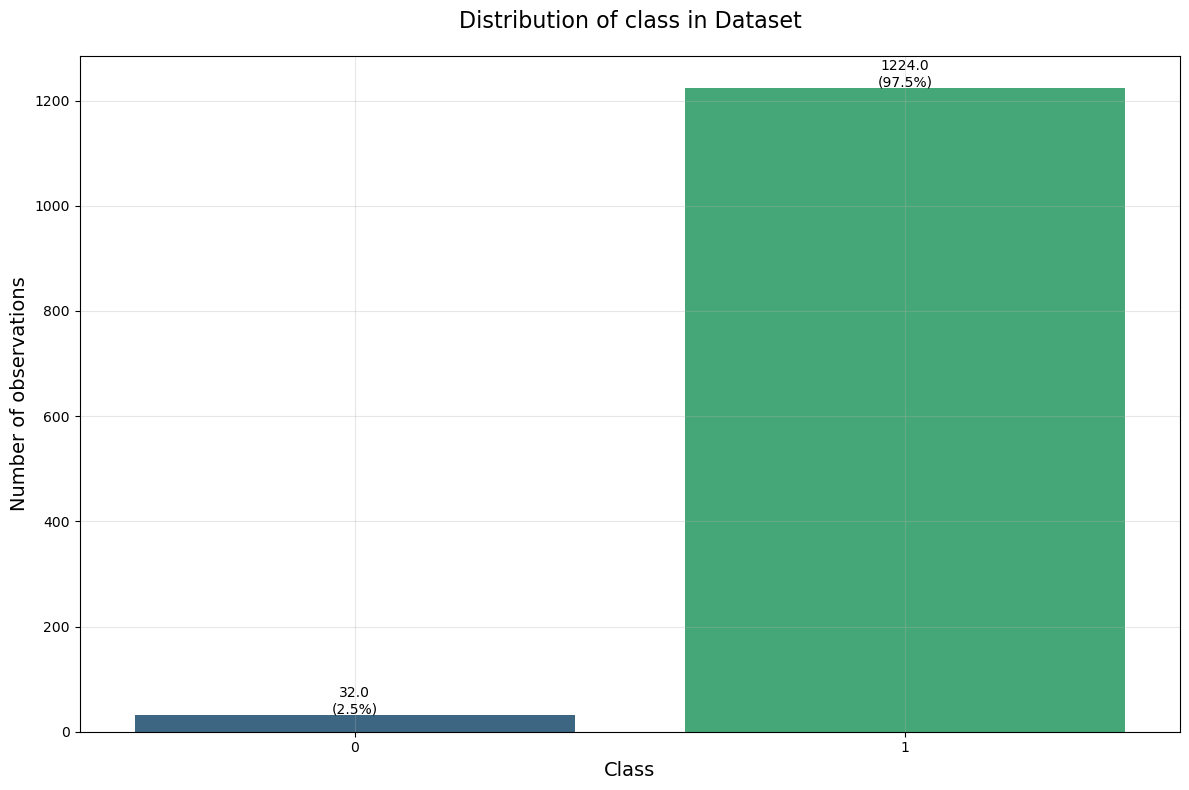

In [10]:
# Visualization of class distribution 
plt.figure(figsize=[12, 8]) 
ax = sns.countplot(x = 'PassOrFail', data=df_filtered, palette='viridis')
plt.title('Distribution of class in Dataset', fontsize=16, pad=20)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Number of observations', fontsize=14)

for p in ax.patches: 
    ax.annotate(f'{p.get_height()}\n({p.get_height()/len(df_filtered):.1%})', 
               (p.get_x() + p.get_width()/2., p.get_height()),
               ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), 
               textcoords='offset points')
plt.grid(True, alpha=0.3) 
plt.tight_layout()
plt.show()

In [11]:
# Removing non-numeric columns other than the target variable
non_numeric_cols = df_filtered.select_dtypes(exclude=['int64', 'float64']).columns
non_numeric_cols = [col for col in non_numeric_cols if col != 'PassOrFail']
df_filtered = df_filtered.drop(columns=non_numeric_cols)

In [12]:
# Removing columns with null values
single_unique_cols = [col for col in df_filtered.columns if df_filtered[col].nunique() == 1]
df_filtered = df_filtered.drop(columns=single_unique_cols)

In [13]:
# Missing Value Analysis 
print('\n Missing Value Analysis:')
missing_values = df_filtered.isnull().sum()
print(missing_values[missing_values > 0])


 Missing Value Analysis:
Series([], dtype: int64)


In [14]:
# Removing columns with a high proportion of missing values
missing_threshold = 0.5 
high_missing_cols = [col for col in df_filtered.columns if df_filtered[col].isnull().mean() > missing_threshold]
df_filtered = df_filtered.drop(columns=high_missing_cols)

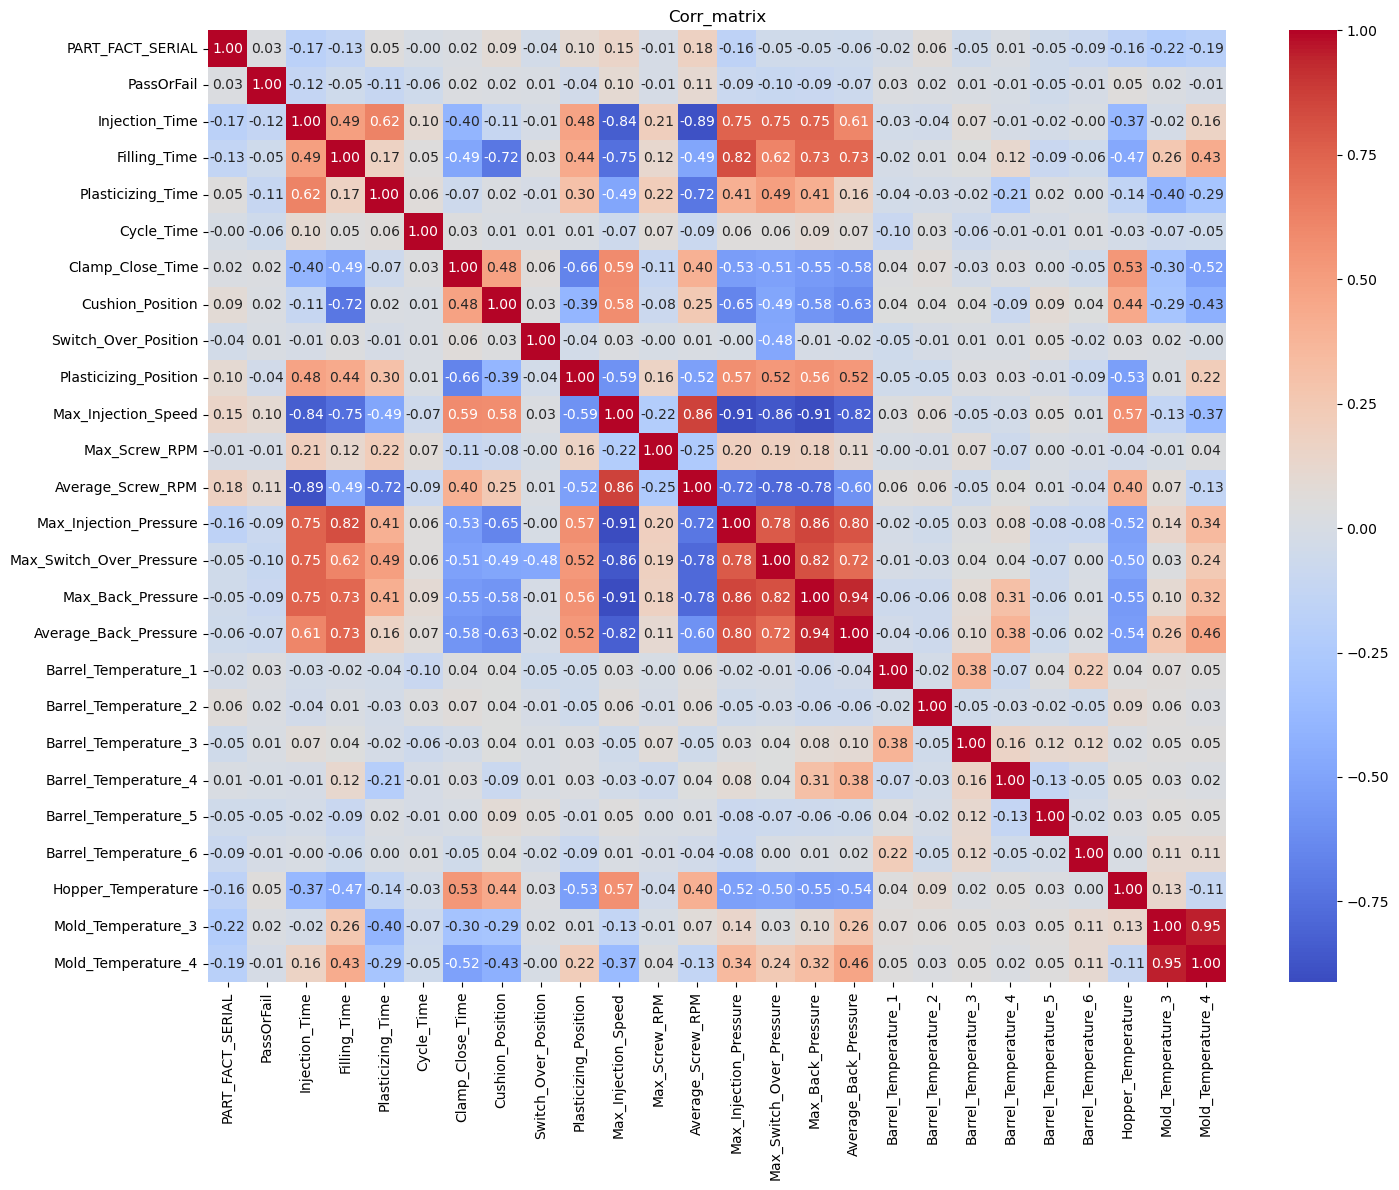

In [15]:
# Correlation Analysis
correlation_matrix = df_filtered.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Corr_matrix')
plt.tight_layout()
plt.show()

In [16]:
# Removing Correlated Features
threshold = 0.8
corr_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            corr_features.add(colname)
            
df_filtered = df_filtered.drop(columns=corr_features)

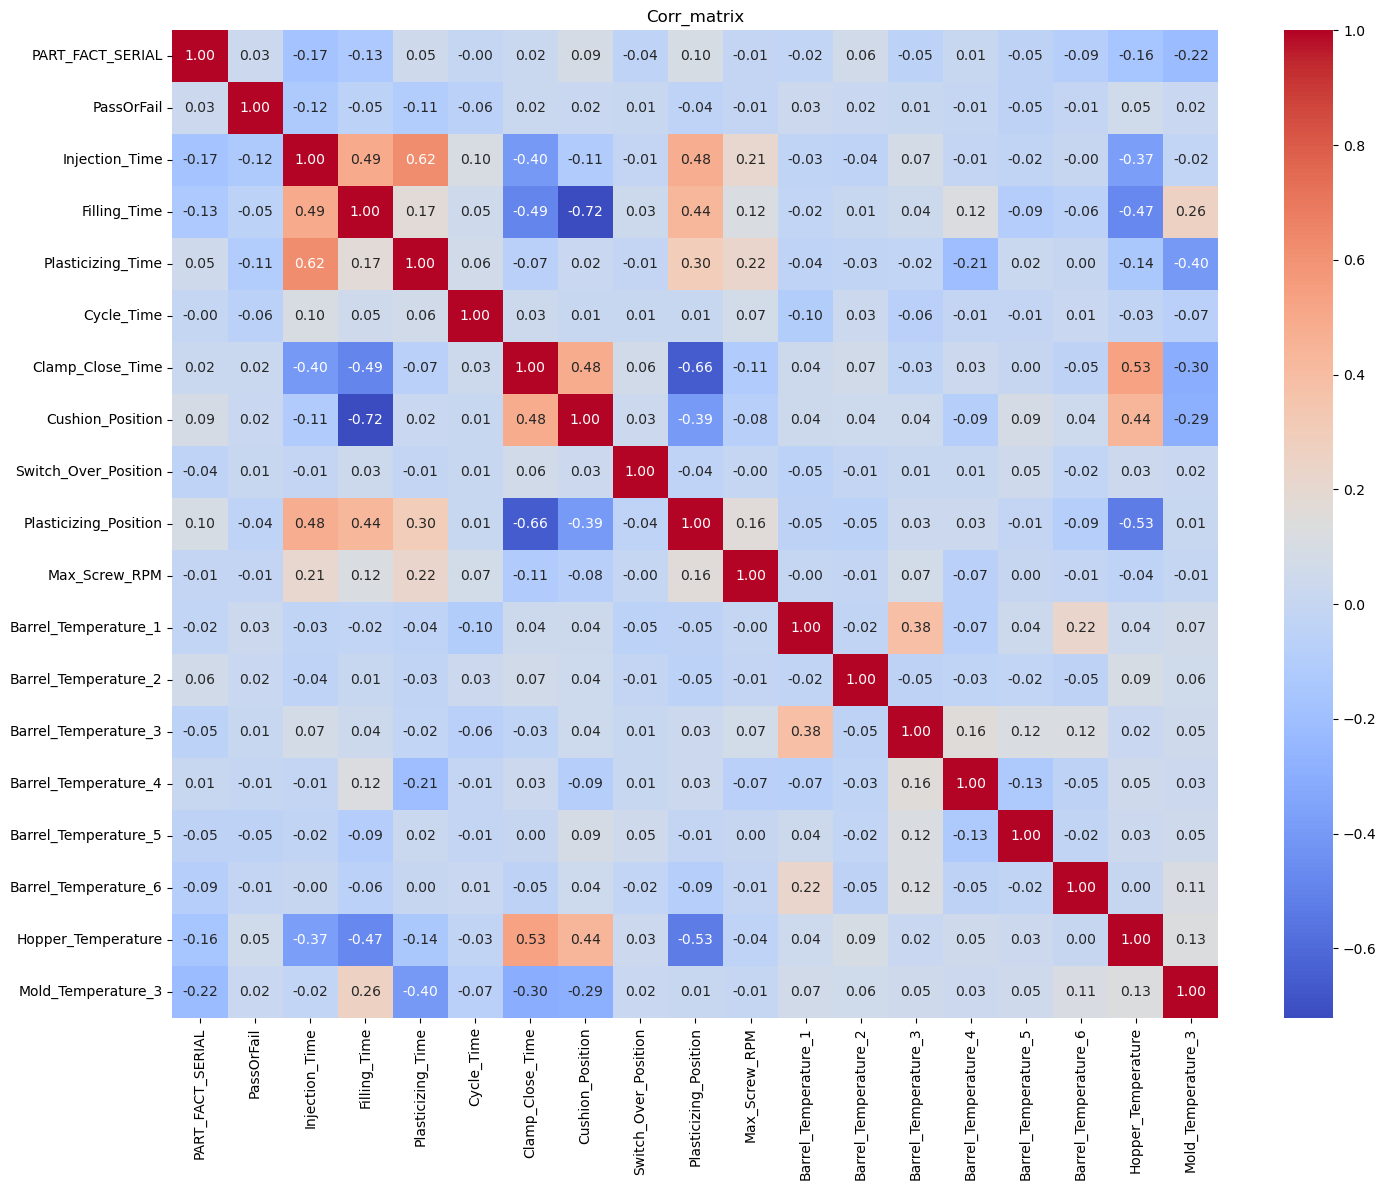

In [17]:
# Correlation Analysis
correlation_matrix = df_filtered.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Corr_matrix')
plt.tight_layout()
plt.show()

In [18]:
df_filtered.describe()

,PART_FACT_SERIAL,PassOrFail,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Max_Screw_RPM,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3
count,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000
mean,10.807325,0.974522,1.060804,0.936561,12.933662,61.771775,6.801975,654.253140,2.086975,53.584443,30.854538,285.952309,285.198408,285.005016,275.360431,265.009077,234.973408,65.513296,22.566481
std,2.092173,0.157634,0.003467,0.005627,0.064924,0.040249,0.007463,0.013271,36.937055,0.015085,0.080408,0.425046,0.409545,0.328609,0.678517,0.316072,0.204242,1.055016,0.683102
min,3.000000,0.000000,1.050000,0.930000,12.800000,61.709999,6.790000,654.210022,0.000000,53.549999,30.700001,284.600006,284.299988,284.200012,273.799988,263.600006,234.399994,62.200001,21.200001
25%,9.000000,1.000000,1.060000,0.930000,12.890000,61.759998,6.800000,654.239990,0.000000,53.570000,30.799999,285.700012,284.899994,284.799988,274.700012,264.799988,234.800003,64.900002,22.000000
50%,10.000000,1.000000,1.060000,0.940000,12.920000,61.779999,6.800000,654.250000,0.000000,53.580002,30.900000,286.000000,285.200012,285.000000,275.399994,265.000000,235.000000,65.599998,22.700001
75%,12.000000,1.000000,1.060000,0.940000,12.960000,61.779999,6.810000,654.260010,0.000000,53.590000,30.900000,286.200012,285.500000,285.100006,275.899994,265.200012,235.100006,66.300003,23.200001
max,18.000000,1.000000,1.080000,0.960000,13.190000,62.200001,6.810000,654.289978,655.309998,53.669998,31.100000,287.100006,286.500000,285.799988,276.799988,266.399994,235.500000,67.699997,23.700001


In [19]:
# Анализ выбросов / Outliers analysis
print("\nАнализ выбросов...")
print("\nOutliers analysis...")
Q1 = df_filtered.quantile(0.25)
Q3 = df_filtered.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df_filtered < (Q1 - 1.5 * IQR)) | (df_filtered > (Q3 + 1.5 * IQR))).sum()
print("\nКоличество выбросов по признакам:")
print("\nNumber of outliers by features:")
print(outliers)


Анализ выбросов...

Outliers analysis...

Количество выбросов по признакам:

Number of outliers by features:
PART_FACT_SERIAL          84
PassOrFail                32
Injection_Time            90
Filling_Time               1
Plasticizing_Time         71
Cycle_Time                72
Clamp_Close_Time           0
Cushion_Position           0
Switch_Over_Position       4
Plasticizing_Position     11
Max_Screw_RPM             18
Barrel_Temperature_1      26
Barrel_Temperature_2       4
Barrel_Temperature_3     119
Barrel_Temperature_4       0
Barrel_Temperature_5      22
Barrel_Temperature_6       0
Hopper_Temperature         8
Mold_Temperature_3         0
dtype: int64


In [20]:
# Создаем копии датасета для разных методов обработки выбросов / Creating dataset copies for different outlier handling methods
df_mean = df_filtered.copy()
df_median = df_filtered.copy()
df_zscore = df_filtered.copy()

In [21]:
# Метод 1: Замена на среднее значение / Method 1: Replacement with mean value
for column in df_mean.columns:
    if column != 'PassOrFail':
        Q1 = df_mean[column].quantile(0.25)
        Q3 = df_mean[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        mean_value = df_mean[(df_mean[column] >= lower_bound) & 
                            (df_mean[column] <= upper_bound)][column].mean()
        
        df_mean.loc[df_mean[column] < lower_bound, column] = mean_value
        df_mean.loc[df_mean[column] > upper_bound, column] = mean_value

# Метод 2: Замена на медиану / Method 2: Replacement with median
for column in df_median.columns:
    if column != 'PassOrFail':
        Q1 = df_median[column].quantile(0.25)
        Q3 = df_median[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        median_value = df_median[(df_median[column] >= lower_bound) & 
                                (df_median[column] <= upper_bound)][column].median()
        
        df_median.loc[df_median[column] < lower_bound, column] = median_value
        df_median.loc[df_median[column] > upper_bound, column] = median_value

# Метод 3: Z-score / Method 3: Z-score
for column in df_zscore.columns:
    if column != 'PassOrFail':
        z_scores = np.abs((df_zscore[column] - df_zscore[column].mean()) / df_zscore[column].std())
        df_zscore = df_zscore[z_scores < 3]


In [22]:
# Выбор лучшего метода на основе статистики / Choosing best method based on statistics
print("\nСравнение методов обработки выбросов:")
print("\nComparison of outlier handling methods:")
methods = {
    'Исходные данные / Original data': df_filtered,
    'Среднее / Mean': df_mean,
    'Медиана / Median': df_median,
    'Z-score': df_zscore
}

for method_name, df in methods.items():
    print(f"\n{method_name}:")
    print(f"Количество строк / Number of rows: {len(df)}")
    print(f"Среднее значение признаков / Mean feature values:")
    print(df.mean())
    print(f"Стандартное отклонение / Standard deviation:")
    print(df.std())

# Используем метод медианы как основной / Using median method as main method
df_filtered = df_median.copy()




Сравнение методов обработки выбросов:

Comparison of outlier handling methods:

Исходные данные / Original data:
Количество строк / Number of rows: 1256
Среднее значение признаков / Mean feature values:
PART_FACT_SERIAL          10.807325
PassOrFail                 0.974522
Injection_Time             1.060804
Filling_Time               0.936561
Plasticizing_Time         12.933662
Cycle_Time                61.771775
Clamp_Close_Time           6.801975
Cushion_Position         654.253140
Switch_Over_Position       2.086975
Plasticizing_Position     53.584443
Max_Screw_RPM             30.854538
Barrel_Temperature_1     285.952309
Barrel_Temperature_2     285.198408
Barrel_Temperature_3     285.005016
Barrel_Temperature_4     275.360431
Barrel_Temperature_5     265.009077
Barrel_Temperature_6     234.973408
Hopper_Temperature        65.513296
Mold_Temperature_3        22.566481
dtype: float64
Стандартное отклонение / Standard deviation:
PART_FACT_SERIAL          2.092173
PassOrFail       

In [23]:
# Используем метод медианы как основной / Using median method as main method
df_filtered = df_median.copy()

In [24]:
# Разделение на признаки и целевую переменную / Splitting into features and target variable
X = df_filtered.drop('PassOrFail', axis=1)
y = df_filtered['PassOrFail']

In [25]:
# Удаление строк с пропущенными значениями / Removing rows with missing values
X = X.dropna()
y = y[X.index]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=0
)


Нормализация данных...

Normalizing data...


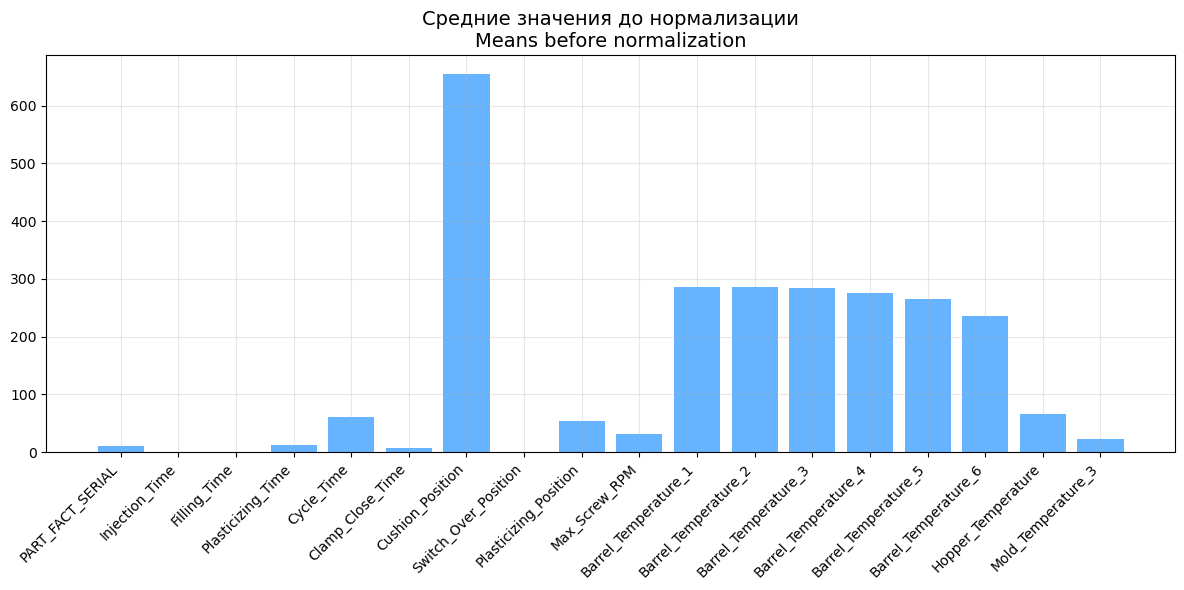

In [27]:
# Нормализация данных / Data normalization
print("\nНормализация данных...")
print("\nNormalizing data...")

# Сохраняем оригинальные данные / Save original data
X_train_original = X_train.copy()
X_test_original = X_test.copy()

# Визуализация до нормализации / Visualization before normalization
plt.figure(figsize=(12, 6))
means_before = X_train_original.mean()
plt.bar(range(len(means_before)), means_before.values, color='#66b3ff')
plt.title('Средние значения до нормализации\nMeans before normalization', fontsize=14)
plt.xticks(range(len(means_before)), means_before.index, rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


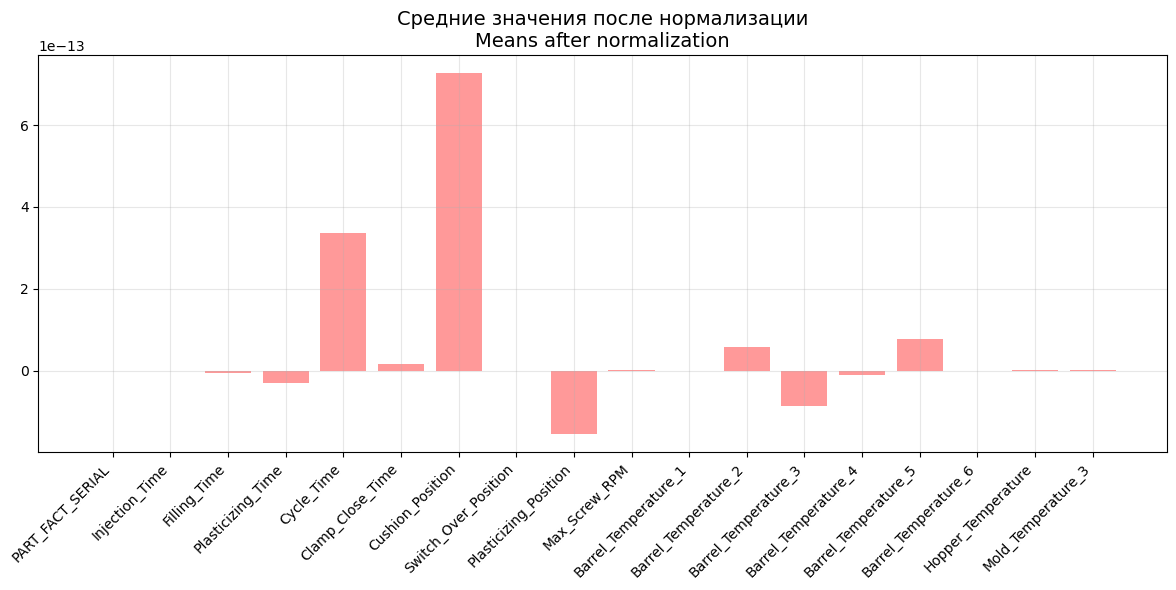

In [28]:
# Нормализуем данные / Normalize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_original)
X_test_scaled = scaler.transform(X_test_original)

# Преобразование обратно в DataFrame для удобства / Converting back to DataFrame for convenience
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_original.columns, index=X_train_original.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_original.columns, index=X_test_original.index)

# Визуализация после нормализации / Visualization after normalization
plt.figure(figsize=(12, 6))
means_after = X_train_scaled.mean()
plt.bar(range(len(means_after)), means_after.values, color='#ff9999')
plt.title('Средние значения после нормализации\nMeans after normalization', fontsize=14)
plt.xticks(range(len(means_after)), means_after.index, rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Data normalization

In [29]:
# Методы балансировки / Balancing methods
sampling_methods = {
    'SMOTE': SMOTE(random_state=0),  # Synthetic Minority Over-sampling Technique / Метод синтетической передискретизации меньшинства
    'UnderSampling': RandomUnderSampler(random_state=0),  # Random under-sampling / Случайное уменьшение выборки
    'SMOTEENN': SMOTEENN(random_state=0),  # SMOTE + Edited Nearest Neighbors / SMOTE с редактированием ближайших соседей
    'ADASYN': ADASYN(random_state=0),  # Adaptive Synthetic Sampling / Адаптивная синтетическая выборка
    'BorderlineSMOTE': BorderlineSMOTE(random_state=0),  # Borderline SMOTE / SMOTE для пограничных случаев
}


Визуализация методов балансировки...

Visualizing balancing methods...


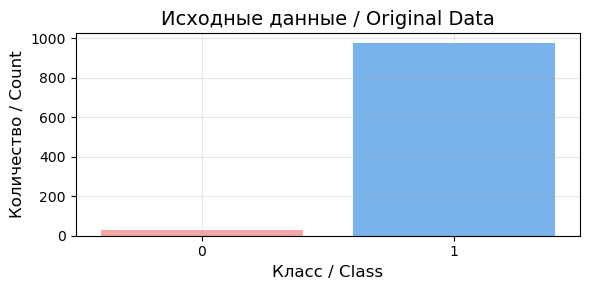

  File "C:\Users\User\anaconda3\envs\senior_level\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


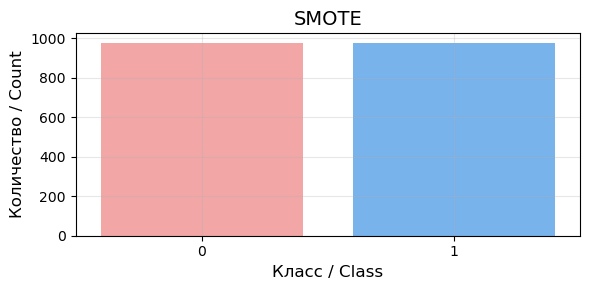

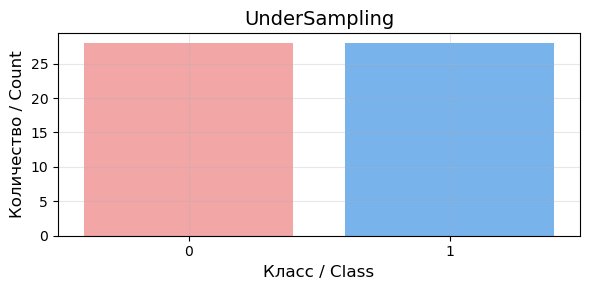

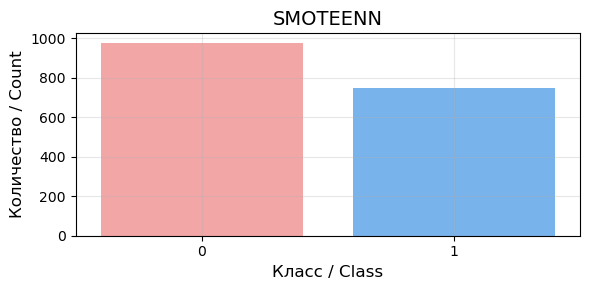

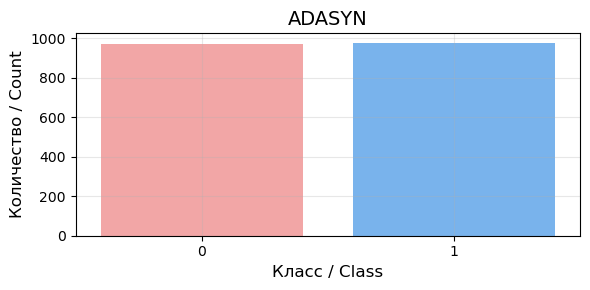

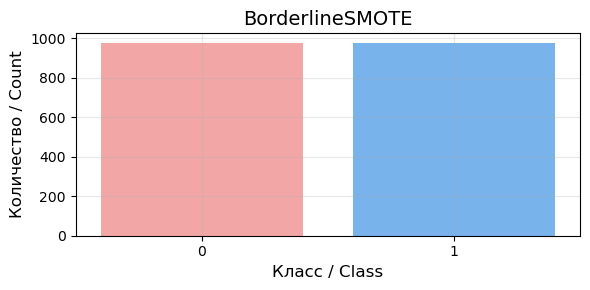

In [30]:
# Визуализация распределения данных после каждого метода балансировки / Visualization of data distribution after each balancing method
print("\nВизуализация методов балансировки...")
print("\nVisualizing balancing methods...")

# Создаем фигуру для всех методов балансировки / Creating figure for all balancing methods
n_methods = len(sampling_methods)
n_cols = 3
n_rows = (n_methods + 1) // n_cols + 1

# Исходные данные / Original data
plt.figure(figsize=(6, 3))
sns.countplot(x=y_train, palette=['#ff9999', '#66b3ff'])
plt.title('Исходные данные / Original Data', fontsize=14)
plt.xlabel('Класс / Class', fontsize=12)
plt.ylabel('Количество / Count', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Применяем каждый метод балансировки и визуализируем результат / Applying each balancing method and visualizing result
for method_name, sampler in sampling_methods.items():
    try:
        X_resampled, y_resampled = sampler.fit_resample(X_train_scaled, y_train)
        plt.figure(figsize=(6, 3))
        sns.countplot(x=y_resampled, palette=['#ff9999', '#66b3ff'])
        plt.title(f'{method_name}', fontsize=14)
        plt.xlabel('Класс / Class', fontsize=12)
        plt.ylabel('Количество / Count', fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Ошибка при применении метода {method_name}: {str(e)}")
        print(f"Error applying method {method_name}: {str(e)}")
        continue


In [31]:
# Параметры для GridSearchCV / Parameters for GridSearchCV
model_params = {
    'Logistic Regression': {
        'model': LogisticRegression(random_state=0, max_iter=1000),
        'params': {
            'C': [0.001, 0.01, 0.1, 1, 10, 100],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear', 'saga']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=0),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(random_state=0),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7],
            'min_samples_split': [2, 5, 10]
        }
    },
    'SVM': {
        'model': SVC(probability=True, random_state=0),
        'params': {
            'C': [0.1, 1, 10, 100],
            'kernel': ['linear', 'rbf', 'poly'],
            'gamma': ['scale', 'auto']
        }
    },
    'XGBoost': {
        'model': XGBClassifier(random_state=0),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7],
            'subsample': [0.8, 0.9, 1.0]
        }
    },
    'CatBoost': {
        'model': CatBoostClassifier(random_state=0, verbose=False),
        'params': {
            'iterations': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'depth': [3, 5, 7],
            'l2_leaf_reg': [1, 3, 5]
        }
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(random_state=0),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2]
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=0),
        'params': {
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'Extra Trees': {
        'model': ExtraTreesClassifier(random_state=0),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10]
        }
    },
    'Bagging': {
        'model': BaggingClassifier(random_state=0),
        'params': {
            'n_estimators': [10, 50, 100],
            'max_samples': [0.5, 0.7, 1.0],
            'max_features': [0.5, 0.7, 1.0]
        }
    }
}


In [32]:
# Функция для поиска лучших параметров / Function to find best parameters
def find_best_params(X_train, y_train, model_name, params):
    print(f"\nПоиск лучших параметров для {model_name}...")
    print(f"\nFinding best parameters for {model_name}...")
    
    grid_search = GridSearchCV(
        estimator=params['model'],
        param_grid=params['params'],
        cv=5,
        scoring='roc_auc',
        n_jobs=-1,
        verbose=1, 
    )
    
    grid_search.fit(X_train, y_train)
    
    print(f"\nЛучшие параметры для {model_name}:")
    print(f"\nBest parameters for {model_name}:")
    print(grid_search.best_params_)
    print(f"Лучший ROC AUC: {grid_search.best_score_:.4f}")
    print(f"Best ROC AUC: {grid_search.best_score_:.4f}")
    
    return grid_search.best_estimator_

# Поиск лучших параметров для каждой модели / Finding best parameters for each model
best_models = {}
for model_name, params in model_params.items():
    best_models[model_name] = find_best_params(X_train_scaled, y_train, model_name, params)

# Обновление списка моделей с лучшими параметрами / Updating models list with best parameters
models = best_models


Поиск лучших параметров для Logistic Regression...

Finding best parameters for Logistic Regression...
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Лучшие параметры для Logistic Regression:

Best parameters for Logistic Regression:
{'C': 0.001, 'penalty': 'l2', 'solver': 'saga'}
Лучший ROC AUC: 0.5103
Best ROC AUC: 0.5103

Поиск лучших параметров для Random Forest...

Finding best parameters for Random Forest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Лучшие параметры для Random Forest:

Best parameters for Random Forest:
{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Лучший ROC AUC: 0.5588
Best ROC AUC: 0.5588

Поиск лучших параметров для Gradient Boosting...

Finding best parameters for Gradient Boosting...
Fitting 5 folds for each of 81 candidates, totalling 405 fits

Лучшие параметры для Gradient Boosting:

Best parameters for Gradient Boosting:
{'learning_rate': 0.2, 'max_depth': 7, 'min_samples_sp

In [33]:
# Функция для обучения и оценки модели / Function for model training and evaluation
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, model_name, sampling_name=None):
    try:
        # Обучение модели / Training model
        model.fit(X_train, y_train)
        
        # Предсказания / Predictions
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]
        
        # Оценка модели / Model evaluation
        print(f"\nОтчет о классификации для {model_name}" + (f" с {sampling_name}" if sampling_name else ""))
        print(f"\nClassification report for {model_name}" + (f" with {sampling_name}" if sampling_name else ""))
        print(classification_report(y_test, y_pred, zero_division=0))
        
        # ROC-кривая / ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        
        return {
            'model': model_name,
            'sampling': sampling_name if sampling_name else 'None',
            'roc_auc': roc_auc,
            'precision': precision_score(y_test, y_pred),
            'recall': recall_score(y_test, y_pred),
            'f1': f1_score(y_test, y_pred)
        }
    except Exception as e:
        print(f"Ошибка при обучении модели {model_name}" + (f" с {sampling_name}" if sampling_name else ""))
        print(f"Error training model {model_name}" + (f" with {sampling_name}" if sampling_name else ""))
        print(str(e))
        return None


### Create Baseline

In [34]:
baseline_model = LogisticRegression(random_state=0, max_iter=1000)
baseline_result = train_and_evaluate_model(baseline_model, X_train_scaled, y_train, X_test_scaled, y_test, 'Baseline')
y_prob_baseline = baseline_model.predict_proba(X_test_scaled)[:, 1]


Отчет о классификации для Baseline

Classification report for Baseline
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.98      1.00      0.99       248

    accuracy                           0.98       252
   macro avg       0.49      0.50      0.50       252
weighted avg       0.97      0.98      0.98       252



In [35]:
print("\n=== Базовая модель на сбалансированных данных ===")
print("\n=== Baseline model on balanced data ===")
balanced_baseline_model = LogisticRegression(random_state=0, max_iter=1000, class_weight='balanced')
balanced_result = train_and_evaluate_model(balanced_baseline_model, X_train_scaled, y_train, X_test_scaled, y_test, 'Baseline', 'Class Weight')
y_prob_balanced = balanced_baseline_model.predict_proba(X_test_scaled)[:, 1]


=== Базовая модель на сбалансированных данных ===

=== Baseline model on balanced data ===

Отчет о классификации для Baseline с Class Weight

Classification report for Baseline with Class Weight
              precision    recall  f1-score   support

           0       0.01      0.25      0.02         4
           1       0.98      0.63      0.77       248

    accuracy                           0.62       252
   macro avg       0.50      0.44      0.39       252
weighted avg       0.97      0.62      0.75       252



In [36]:
# Создание списка результатов / Creating results list
results = [baseline_result, balanced_result]

In [37]:
# ROC-кривая для сбалансированной базовой модели / ROC curve for balanced baseline model
fpr_balanced, tpr_balanced, _ = roc_curve(y_test, y_prob_balanced)
roc_auc_balanced = auc(fpr_balanced, tpr_balanced)

In [38]:
# Обучение и оценка моделей с разными методами балансировки / Training and evaluating models with different balancing methods
for model_name, model in models.items():
    print(f"\n=== Модель: {model_name} ===")
    print(f"\n=== Model: {model_name} ===")
    
    for sampling_name, sampler in sampling_methods.items():
        try:
            # Применение метода балансировки / Applying balancing method
            X_resampled, y_resampled = sampler.fit_resample(X_train_scaled, y_train)
            
            # Обучение и оценка модели / Training and evaluating model
            result = train_and_evaluate_model(model, X_resampled, y_resampled, X_test_scaled, y_test, model_name, sampling_name)
            if result:
                results.append(result)
                
        except Exception as e:
            print(f"Ошибка при применении метода {sampling_name}: {str(e)}")
            print(f"Error applying method {sampling_name}: {str(e)}")
            continue


=== Модель: Logistic Regression ===

=== Model: Logistic Regression ===

Отчет о классификации для Logistic Regression с SMOTE

Classification report for Logistic Regression with SMOTE
              precision    recall  f1-score   support

           0       0.02      0.50      0.04         4
           1       0.99      0.62      0.76       248

    accuracy                           0.62       252
   macro avg       0.50      0.56      0.40       252
weighted avg       0.97      0.62      0.75       252


Отчет о классификации для Logistic Regression с UnderSampling

Classification report for Logistic Regression with UnderSampling
              precision    recall  f1-score   support

           0       0.02      0.50      0.03         4
           1       0.98      0.52      0.68       248

    accuracy                           0.52       252
   macro avg       0.50      0.51      0.36       252
weighted avg       0.97      0.52      0.67       252


Отчет о классификации для Logi

In [39]:
# Создание DataFrame с результатами / Creating DataFrame with results
results_df = pd.DataFrame(results)

In [41]:
# Сортировка результатов по ROC AUC / Sorting results by ROC AUC
results_df = results_df.sort_values('roc_auc', ascending=False)

# Вывод результатов в табличном виде / Output results in tabular form
print("\nСравнение результатов всех моделей:")
print("\nComparison of all models results:")
print(results_df.sort_values('roc_auc', ascending=False))

# Определение лучшей модели / Determining the best model
best_result = results_df.loc[results_df['roc_auc'].idxmax()]
print(f"\nЛучшая модель: {best_result['model']} с методом балансировки {best_result['sampling']}")
print(f"\nBest model: {best_result['model']} with balancing method {best_result['sampling']}")
print(f"ROC AUC: {best_result['roc_auc']:.3f}")
print(f"Precision: {best_result['precision']:.3f}")
print(f"Recall: {best_result['recall']:.3f}")
print(f"F1-score: {best_result['f1']:.3f}")


Сравнение результатов всех моделей:

Comparison of all models results:
                  model         sampling   roc_auc  precision    recall  \
28             CatBoost    UnderSampling  0.912298   1.000000  0.504032   
48              Bagging    UnderSampling  0.886593   1.000000  0.447581   
13    Gradient Boosting    UnderSampling  0.838710   1.000000  0.604839   
30             CatBoost           ADASYN  0.822581   0.984127  1.000000   
16    Gradient Boosting  BorderlineSMOTE  0.819556   0.983806  0.979839   
38        Decision Tree    UnderSampling  0.798387   1.000000  0.495968   
27             CatBoost            SMOTE  0.791331   0.984000  0.991935   
15    Gradient Boosting           ADASYN  0.785282   0.984064  0.995968   
33             AdaBoost    UnderSampling  0.765121   1.000000  0.556452   
12    Gradient Boosting            SMOTE  0.758065   0.983936  0.987903   
31             CatBoost  BorderlineSMOTE  0.758065   0.984064  0.995968   
25              XGBoost     

In [42]:
# Использование лучшей модели / Using the best model
if best_result['sampling'] == 'Class Weight':
    # Если лучшая модель - с балансировкой через class_weight / If best model uses class_weight balancing
    best_model_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', LogisticRegression(random_state=0, max_iter=1000, class_weight='balanced'))
    ])
    best_model_pipeline.fit(X_train, y_train)
else:
    # Если лучшая модель - с другим методом балансировки / If best model uses other balancing method
    best_sampler = sampling_methods[best_result['sampling']]
    X_resampled, y_resampled = best_sampler.fit_resample(X_train_scaled, y_train)
    best_model_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', models[best_result['model']])
    ])
    best_model_pipeline.fit(X_resampled, y_resampled)

In [43]:
# Оценка финальной модели / Evaluating final model
y_pred_final = best_model_pipeline.predict(X_test_scaled)
y_prob_final = best_model_pipeline.predict_proba(X_test_scaled)[:, 1]

print("\nОтчет о классификации для финальной модели:")
print("\nClassification report for final model:")
print(classification_report(y_test, y_pred_final, zero_division=0))


Отчет о классификации для финальной модели:

Classification report for final model:
              precision    recall  f1-score   support

           0       0.03      1.00      0.06         4
           1       1.00      0.47      0.64       248

    accuracy                           0.48       252
   macro avg       0.51      0.73      0.35       252
weighted avg       0.98      0.48      0.63       252



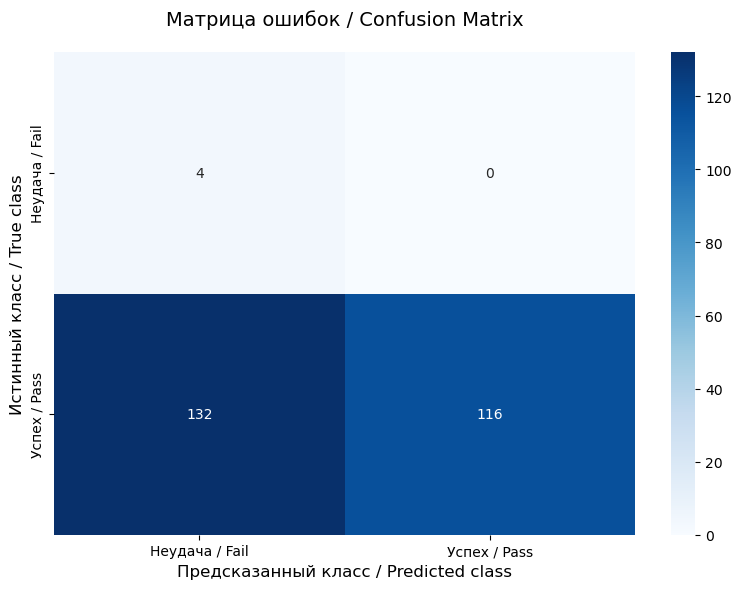

In [44]:
# Матрица ошибок / Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_final), 
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['Неудача / Fail', 'Успех / Pass'],
            yticklabels=['Неудача / Fail', 'Успех / Pass'])
plt.title('Матрица ошибок / Confusion Matrix', fontsize=14, pad=20)
plt.xlabel('Предсказанный класс / Predicted class', fontsize=12)
plt.ylabel('Истинный класс / True class', fontsize=12)
plt.tight_layout()
plt.show()

In [45]:
# Сохранение финальной модели / Saving final model
print("\nСохранение финальной модели...")
print("\nSaving final model...")
joblib.dump(best_model_pipeline, 'final_pipeline.pkl')


Сохранение финальной модели...

Saving final model...


['final_pipeline.pkl']

In [46]:
auc_results = []

In [47]:
# Добавляем результаты базовых моделей / Adding baseline models results
auc_results.append({
    'model': 'Baseline',
    'sampling': 'None',
    'auc': baseline_result['roc_auc']
})

auc_results.append({
    'model': 'Baseline',
    'sampling': 'Class Weight',
    'auc': balanced_result['roc_auc']
})

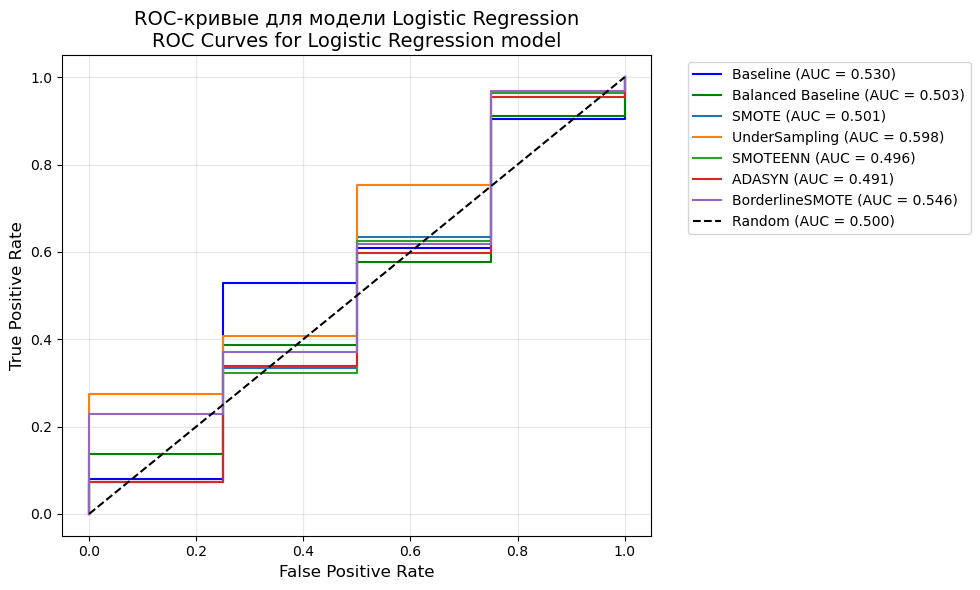

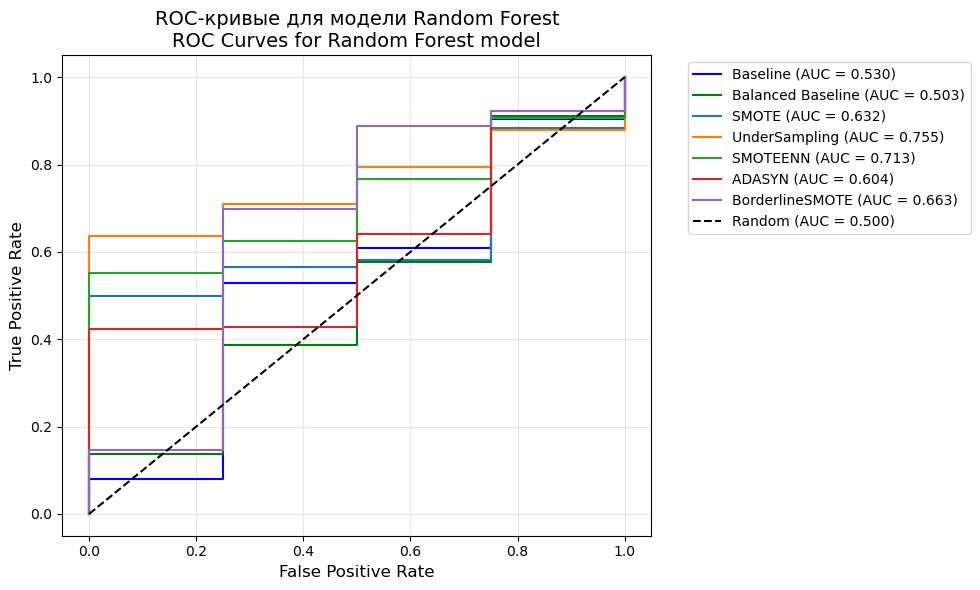

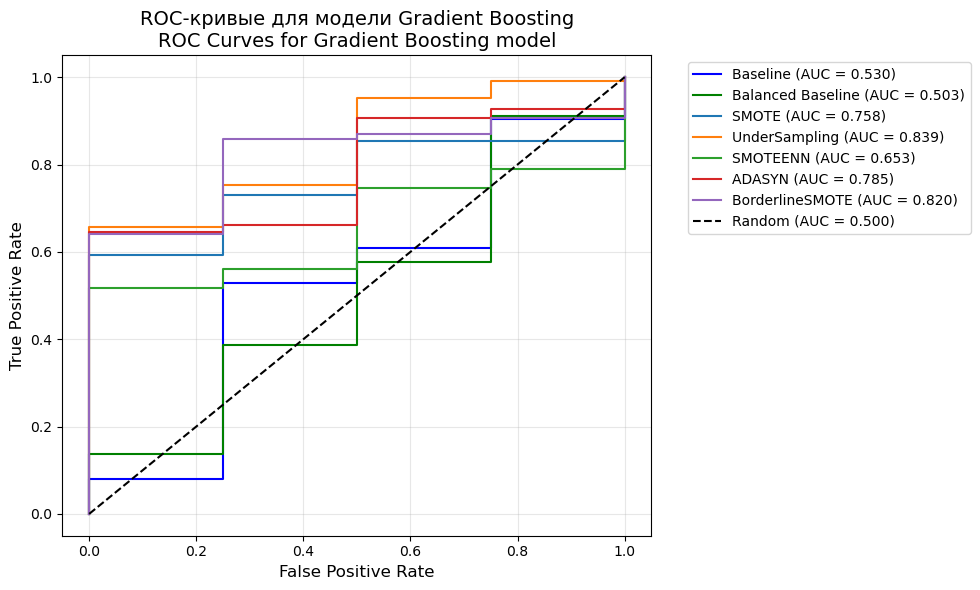

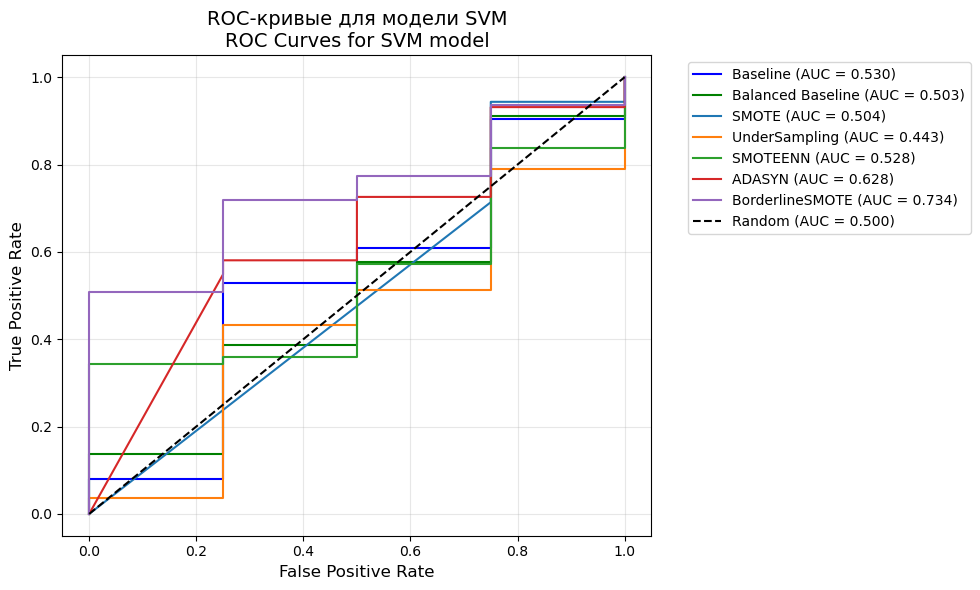

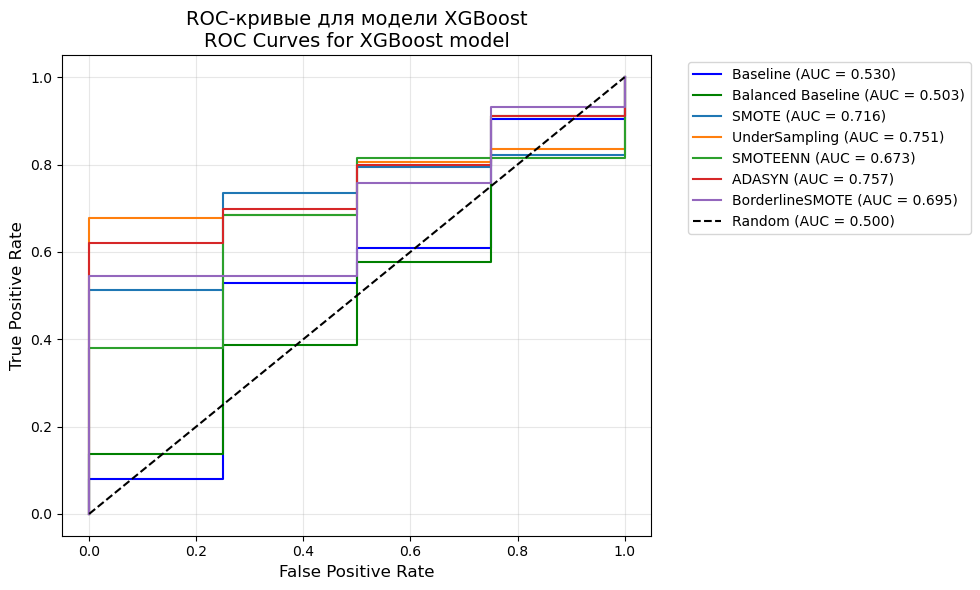

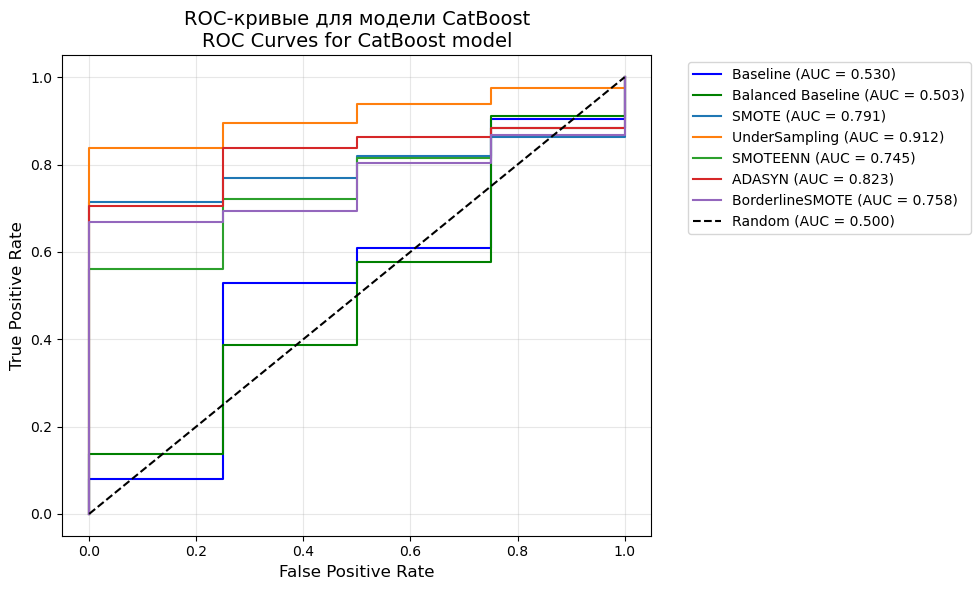

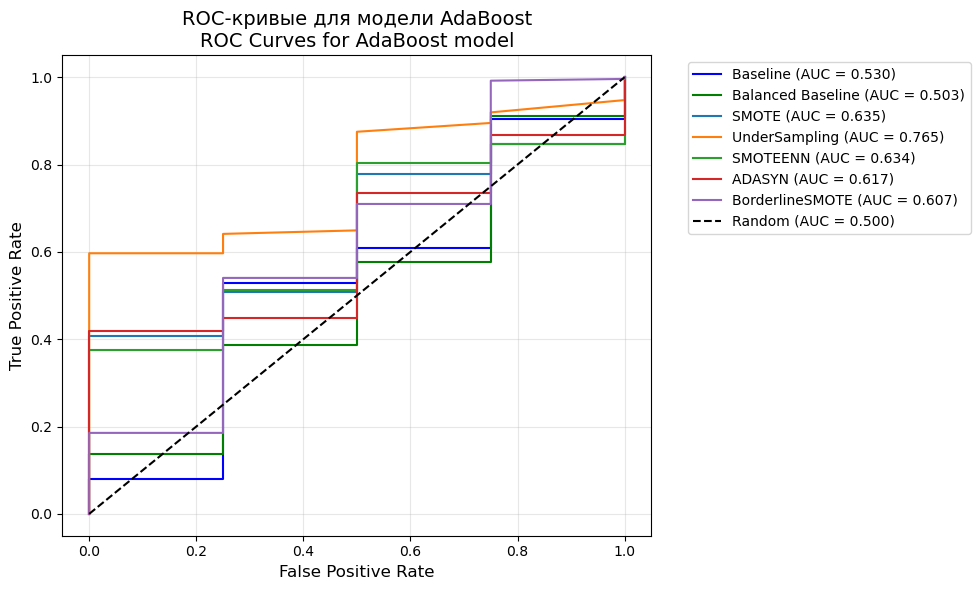

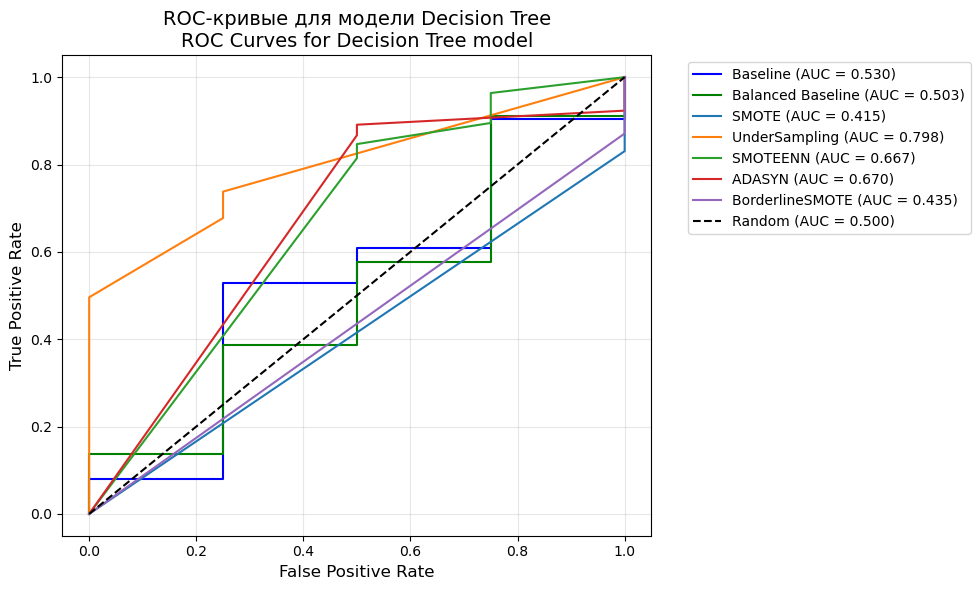

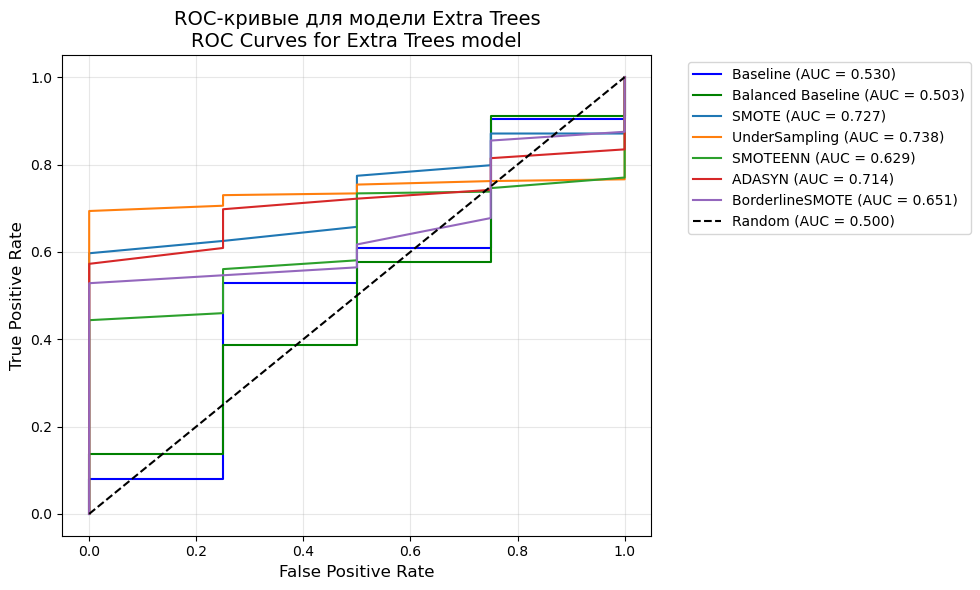

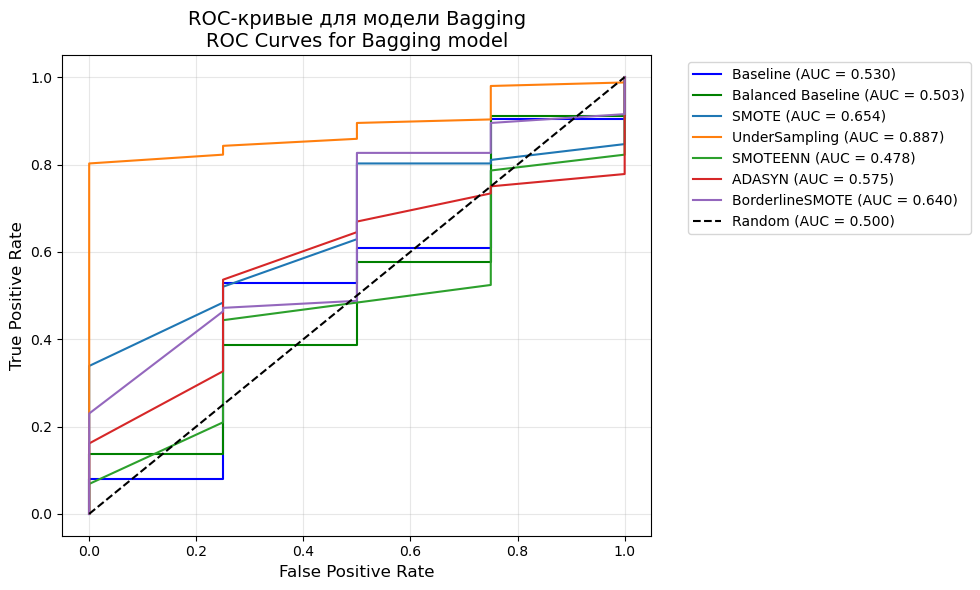

In [48]:
# Добавляем результаты для каждой модели и метода балансировки / Adding results for each model and balancing method
for model_name, model in models.items():
    plt.figure(figsize=(10, 6))
    
    # ROC-кривая для базовой модели / ROC curve for baseline model
    fpr_baseline, tpr_baseline, _ = roc_curve(y_test, y_prob_baseline)
    roc_auc_baseline = auc(fpr_baseline, tpr_baseline)
    plt.plot(fpr_baseline, tpr_baseline, 'b-', 
             label=f'Baseline (AUC = {roc_auc_baseline:.3f})')
    
    # ROC-кривая для сбалансированной базовой модели / ROC curve for balanced baseline model
    fpr_balanced, tpr_balanced, _ = roc_curve(y_test, y_prob_balanced)
    roc_auc_balanced = auc(fpr_balanced, tpr_balanced)
    plt.plot(fpr_balanced, tpr_balanced, 'g-', 
             label=f'Balanced Baseline (AUC = {roc_auc_balanced:.3f})')
    
    # ROC-кривые для каждого метода балансировки / ROC curves for each balancing method
    for sampling_name, sampler in sampling_methods.items():
        try:
            X_resampled, y_resampled = sampler.fit_resample(X_train_scaled, y_train)
            model.fit(X_resampled, y_resampled)
            y_prob = model.predict_proba(X_test_scaled)[:, 1]
            fpr, tpr, _ = roc_curve(y_test, y_prob)
            roc_auc = auc(fpr, tpr)
            
            plt.plot(fpr, tpr, label=f'{sampling_name} (AUC = {roc_auc:.3f})')
            
            auc_results.append({
                'model': model_name,
                'sampling': sampling_name,
                'auc': roc_auc
            })
        except Exception as e:
            print(f"Ошибка при построении ROC-кривой для {model_name} с {sampling_name}: {str(e)}")
            print(f"Error plotting ROC curve for {model_name} with {sampling_name}: {str(e)}")
            continue
    
    plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.500)')
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title(f'ROC-кривые для модели {model_name}\nROC Curves for {model_name} model', fontsize=14)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

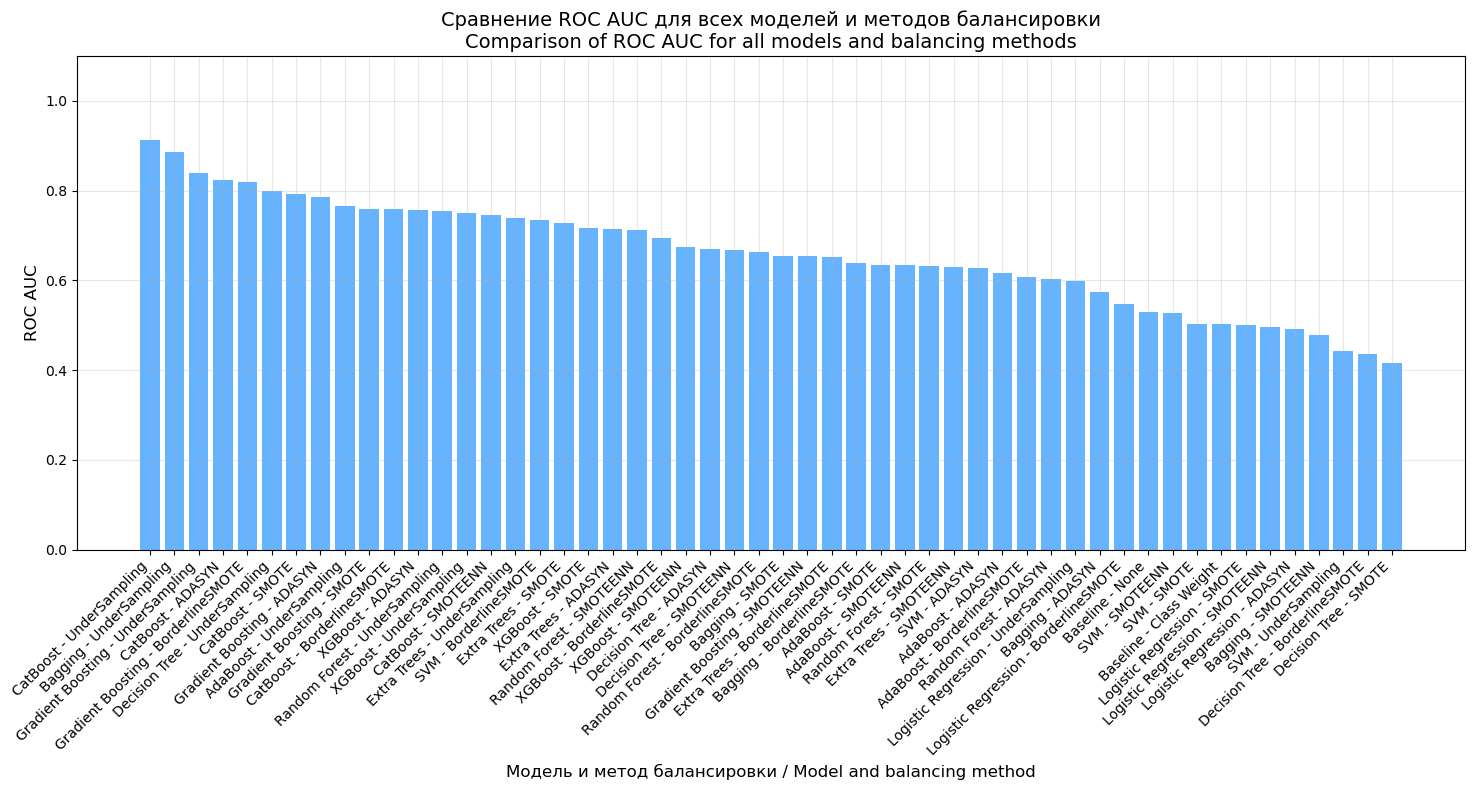

In [49]:
# Преобразуем в DataFrame / Convert to DataFrame
auc_df = pd.DataFrame(auc_results)

# Сортируем по значению AUC / Sort by AUC value
auc_df = auc_df.sort_values('auc', ascending=False)

# Создаем визуализацию AUC в виде столбчатой диаграммы / Create AUC visualization as bar plot
plt.figure(figsize=(15, 8))
bars = plt.bar(auc_df['model'] + ' - ' + auc_df['sampling'], auc_df['auc'], color='#66b3ff')

# Добавляем значения в DataFrame / Add values to DataFrame
auc_df['AUC Value'] = auc_df['auc'].apply(lambda x: f'{x:.3f}')
auc_df['AUC Percentage'] = auc_df['auc'].apply(lambda x: f'{x*100:.1f}%')

plt.title('Сравнение ROC AUC для всех моделей и методов балансировки\nComparison of ROC AUC for all models and balancing methods', fontsize=14)
plt.xlabel('Модель и метод балансировки / Model and balancing method', fontsize=12)
plt.ylabel('ROC AUC', fontsize=12)
plt.ylim(0, 1.1)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [50]:
# Выводим DataFrame с дополнительными столбцами / Display DataFrame with additional columns
print("\nРезультаты AUC для всех моделей:")
print("\nAUC results for all models:")
print(auc_df[['model', 'sampling', 'AUC Value', 'AUC Percentage']]) 


Результаты AUC для всех моделей:

AUC results for all models:
                  model         sampling AUC Value AUC Percentage
28             CatBoost    UnderSampling     0.912          91.2%
48              Bagging    UnderSampling     0.887          88.7%
13    Gradient Boosting    UnderSampling     0.839          83.9%
30             CatBoost           ADASYN     0.823          82.3%
16    Gradient Boosting  BorderlineSMOTE     0.820          82.0%
38        Decision Tree    UnderSampling     0.798          79.8%
27             CatBoost            SMOTE     0.791          79.1%
15    Gradient Boosting           ADASYN     0.785          78.5%
33             AdaBoost    UnderSampling     0.765          76.5%
12    Gradient Boosting            SMOTE     0.758          75.8%
31             CatBoost  BorderlineSMOTE     0.758          75.8%
25              XGBoost           ADASYN     0.757          75.7%
8         Random Forest    UnderSampling     0.755          75.5%
23           

In [51]:
# Установка стиля для графиков / Setting style for plots
plt.style.use('ggplot')  # Используем стиль ggplot вместо seaborn 

# Экспорт необходимых переменных для использования в других файлах
__all__ = ['df_filtered', 'X', 'y', 'results_df', 'best_model_pipeline'] 